In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
with open('Tag_Text_Files/tags part 1.txt', 'r') as file:
    reader = csv.reader(file)

    data = []             # Initialize empty list
    database = dict()
    recent_EPC = ''
    Time_Or_Data = True   # Time is true, Data is false

    reached_24 = False

    for l in reader:

        line = l[0]
         
        if len(line)==24: # If it is an EPC
            database[line] = [[],[]]
            recent_EPC = line
        
        elif line == '[':
            data = []

        elif line == ']': # End of list
            if len(data)!=0:
                if Time_Or_Data:
                    database[recent_EPC][0] = data
                    Time_Or_Data = False
                else:
                    database[recent_EPC][1] = data
                    Time_Or_Data = True
            data = []

        elif len(line)==8: # If it is a time stamp
            h,m,s = line.split(':')

            if int(h)==23:
                reached_24 = True

            if reached_24 and int(h) < 12:
                day=2
            else:
                day=1

            data.append(datetime.datetime(1900, 1, day,int(h),int(m),int(s)))
        
        elif line ==' ':
            pass

        else: # If it is a data point
            try:
                data.append(float(line))
            except:
                pass

num = []
for k,v in database.items():
    num.append(len(v[1]))
print("Number of Tags each unique Tag was Read for tags really long.txt")
# print(sorted(num))
print(len(num))

Number of Tags each unique Tag was Read for tags really long.txt
14


In [3]:
import matplotlib.dates as mdates
hours = mdates.HourLocator(interval = 1)
myFmt = mdates.DateFormatter('%H:%M')

Text(0.5, 1.0, 'tags part 1.txt, Temperatures over Time')

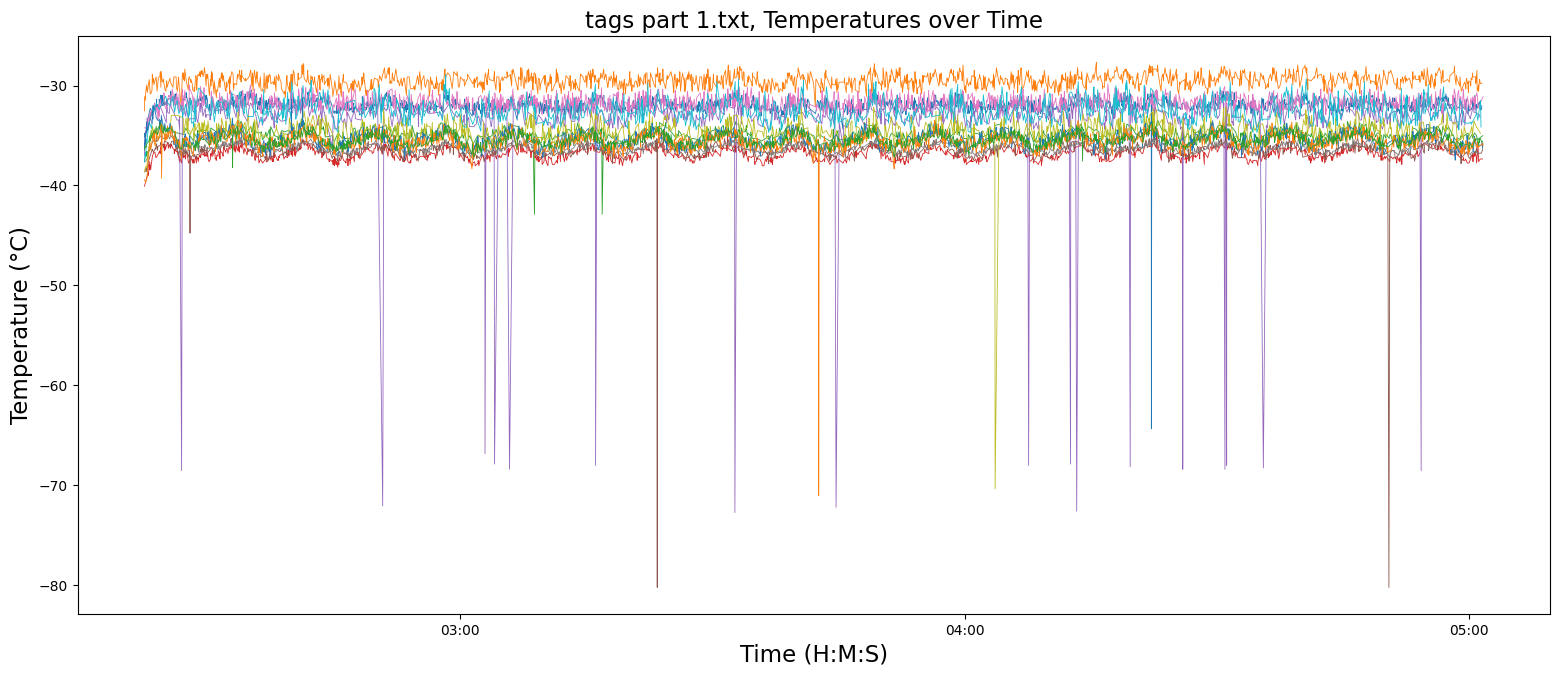

In [4]:
fig, ax = plt.subplots(figsize=(19, 7.5))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(myFmt)

for k,v in database.items():
    if len(v[1]) > 1:
        ax.plot(v[0], v[1], label=k, linewidth=0.6)

ax.set_ylabel("Temperature (°C)", fontsize=16.5)
ax.set_xlabel("Time (H:M:S)", fontsize=16.5)
ax.set_title("tags part 1.txt, Temperatures over Time", fontsize=16.5)

In [5]:
vs = dict()
for k,v in database.items():
    v_0, ts = [], []

    for time in v[0]:

        span = time + datetime.timedelta(minutes=1)

        count = 0
        for a,b in zip(v[0],v[1]):
            if a < span and a > time:
                count += 1

                if a > span:
                    break
        
        v_0.append(count)
        ts.append(time)
    vs[k] = [v_0, ts]

In [11]:
from tqdm import tqdm
start = datetime.datetime(1900, 1, 1, 2,22, 0);

times, counts = [], []
tags = []
for i in tqdm(range(9000)):                       # For each second in the test

    span = start + datetime.timedelta(seconds=60)
    count = 0                                      # Count of number of tags read in the minute-long span
    tag_count = 0

    first_index = dict();
    for k,v in database.items():                   # Setup first index dictionary for efficiency
        first_index[k] = 0

    for k,v in database.items():                   # Iterate over each tag in the database

        yes_tag = False                                # Boolean to check if the tag is in the span
        first_i = False

        # for i,m,n in zip(range(len(v[0])), v[0],v[1]): # For timestamp,temp_value for each tag...

        for i,m in zip(range(first_index[k],len(v[0])), v[0][first_index[k]:]): # For timestamp,temp_value for each tag...
            if m < span and m > start:                   # If the timestamp is within the minute-long span...

                if not yes_tag:
                    yes_tag = True
                    tag_count += 1

                if not first_i:
                    first_i = True
                    first_index[k]=i

                count += 1                         # Increment the count
            
            if m > span:                           # If the timestamp is greater than the span, break
                break

    tags.append(tag_count)
    times.append(start)
    counts.append(count)

    start += datetime.timedelta(seconds=1)


100%|██████████| 9000/9000 [00:25<00:00, 353.16it/s] 


Text(0.5, 1.0, 'tags part 1.txt, Number of Tags Read Per Minute')

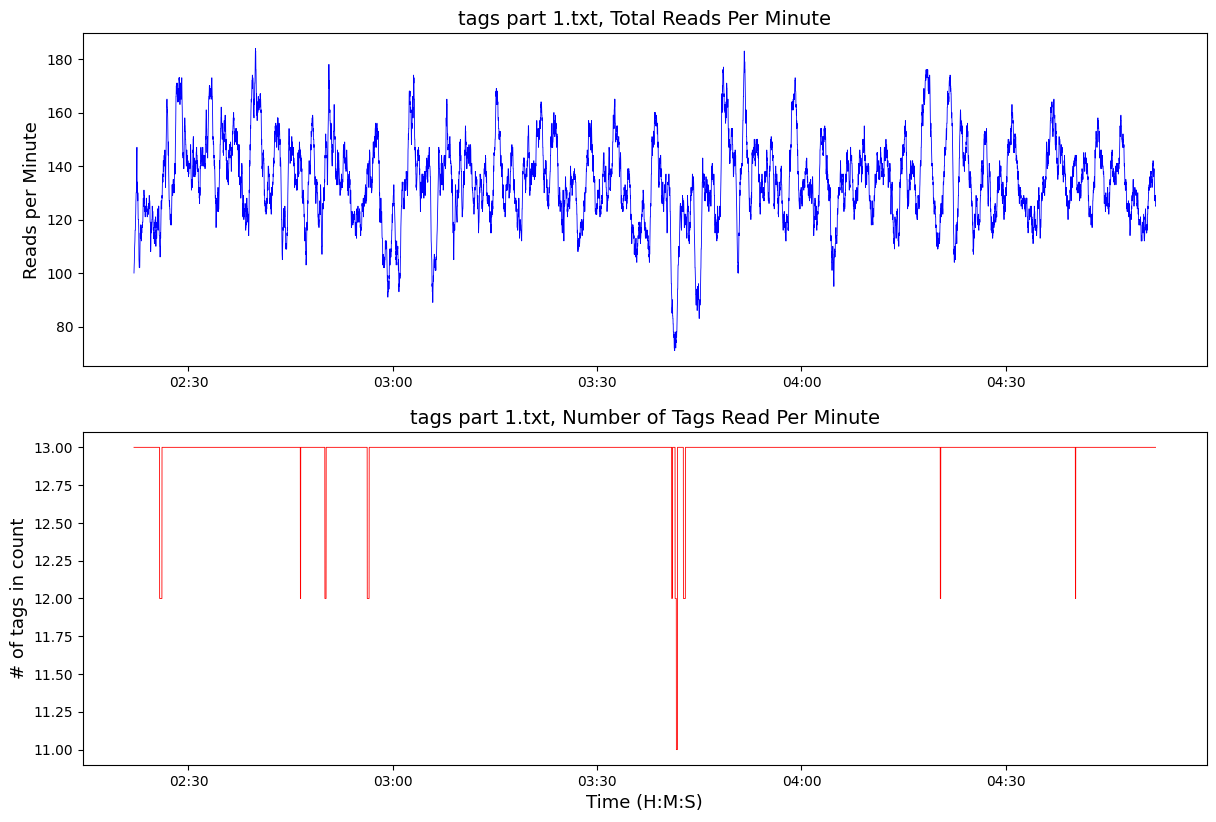

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14.5, 9.5))
ax1.plot(times, counts, "blue", linewidth=0.6, label="Reads per minute")
ax2.plot(times, tags, "red", linewidth=0.6, label="# of tags in count")
ax2.set_xlabel("Time (H:M:S)", fontsize=13)
ax1.set_ylabel("Reads per Minute", fontsize=13)
ax1.set_title("tags part 1.txt, Total Reads Per Minute", fontsize=14)
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax2.set_ylabel("# of tags in count", fontsize=13)
ax2.set_title("tags part 1.txt, Number of Tags Read Per Minute", fontsize=14)

Text(0.5, 1.0, 'tags98.txt, Reads per Minute by Tag')

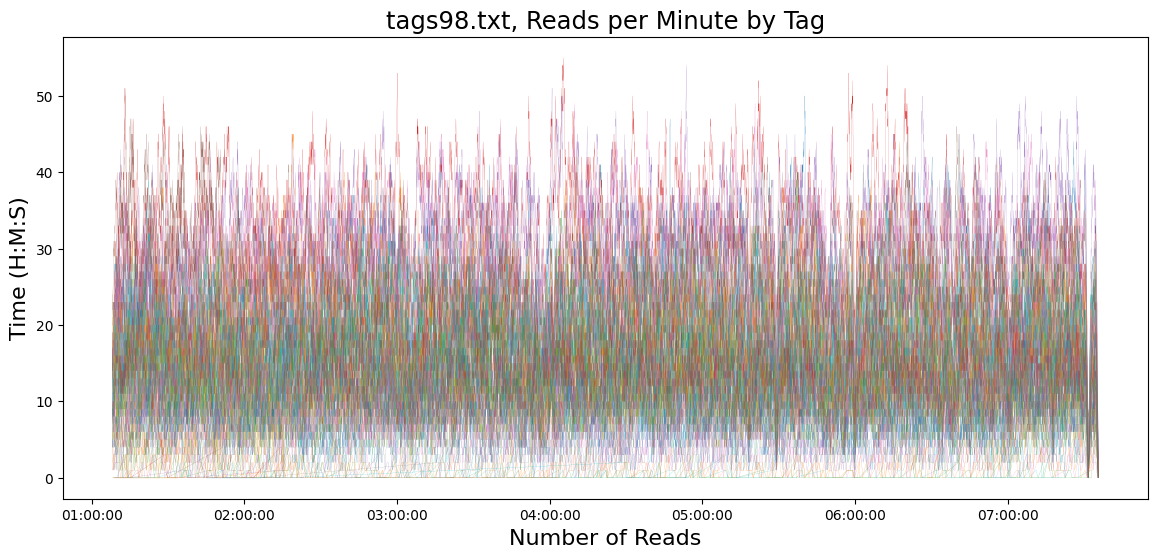

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax.xaxis.set_major_formatter(myFmt)

for i,j in vs.items():
    ax.plot(j[1], j[0], linewidth=0.1, label=i)
ax.set_xlabel("Number of Reads", fontsize=16)
ax.set_ylabel("Time (H:M:S)", fontsize=16)
ax.set_title("tags98.txt, Reads per Minute by Tag", fontsize=17.5)